### Combined UKCP18 and EuroCORDEX Plots:

In [1]:
import xarray
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import warnings

In [2]:
ids = ['UK', 'East Midlands', 'East of England',
       'East Scotland','London','North-East England',
       'North Scotland','North-West England',
       'South-East England','South-West England',
       'West Midlands','West Scotland',
       'Yorkshire and Humberside',
       'Channel Islands',
       'Isle of Man',
       'Northern Ireland','Wales']
save_ids = ['uk', 'e_mdls', 'e_eng',
       'e_scot','ldn','ne_eng',
       'n_scot','nw_eng',
       'se_eng','sw_eng',
       'w_mdls','w_scot',
       'yorks_n_hums',
       'chnl_isl',
       'isl_man',
       'n_irln','wales']

In [3]:
wnd_uk = xarray.open_dataset(f'/home/theo/data/ukcp18/sfcWind_rcp85_ukcp18_natgb_01_day_19801201-20801130.nc')
wnd_eu = xarray.open_dataset(f'/data/met/ukcordex/CNRM-CERFACS-CNRM-CM5/HadREM3-GA7-05/r1i1p1/dmo/sfcWind_natgb_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_MOHC-HadREM3-GA7-05_v2_day_19801201-20801130.nc')

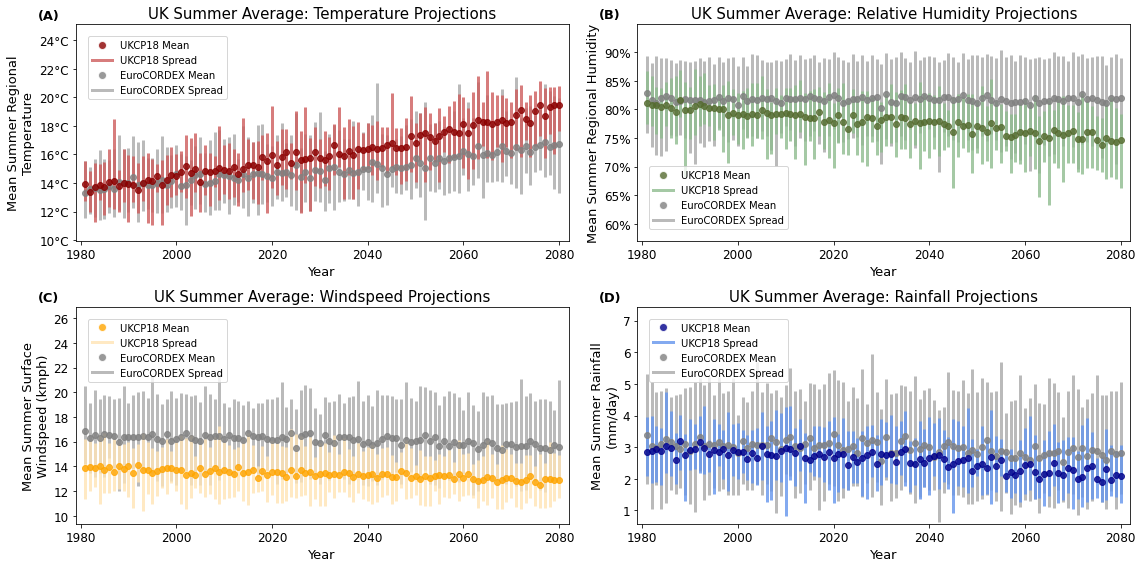

In [35]:
j = 0

# Loading UKCP18 data:
tas_ukcp_names = [f'/home/theo/outdata/1.5.outdata/tas_model_{i+1}_region_{j}_summer.npy' for i in range(12)]
tas_ukcp = np.array([np.load(fname) for fname in tas_ukcp_names])
hur_ukcp_names = [f'/home/theo/outdata/1.5.outdata/hurs_model_{i+1}_region_{j}_summer.npy' for i in range(12)]
hur_ukcp = np.array([np.load(fname) for fname in hur_ukcp_names])
wnd_ukcp_names = [f'/home/theo/outdata/1.5.outdata/wind_model_{i+1}_region_{j}_summer.npy' for i in range(12)]
wnd_ukcp = np.array([np.load(fname) for fname in wnd_ukcp_names])
prc_ukcp_names = [f'/home/theo/outdata/1.5.outdata/pr_model_{i+1}_region_{j}_summer.npy' for i in range(12)]
prc_ukcp = np.array([np.load(fname) for fname in prc_ukcp_names])

# Loading CORDEX data:
tas_cord_names = [f'/home/theo/outdata/01_data/tas_model_{i+1}_region_{j}_summer.npy' for i in range(1,49)]
tas_cord = np.array([np.load(fname) for fname in tas_cord_names])
hur_cord_names = [f'/home/theo/outdata/01_data/hurs_model_{i+1}_region_{j}_summer.npy' for i in range(1,49)]
hur_cord = np.array([np.load(fname) for fname in hur_cord_names])
wnd_cord_names = [f'/home/theo/outdata/01_data/wind_model_{i+1}_region_{j}_summer.npy' for i in range(1,49)]
wnd_cord = np.array([np.load(fname) for fname in wnd_cord_names])
prc_cord_names = [f'/home/theo/outdata/01_data/pr_model_{i+1}_region_{j}_summer.npy' for i in range(1,49)]
prc_cord = np.array([np.load(fname) for fname in prc_cord_names])

# Making dates:
dates = np.array([1981 + i for i in range(100)])



fig,axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(16)




# Plotting Temperature:
axs[0,0].errorbar(dates, np.nanmean(tas_cord,axis = 0), 
             yerr=np.stack((np.nanmean(tas_cord,axis = 0) - np.nanmin(tas_cord,axis = 0),
                            np.nanmax(tas_cord,axis = 0) - np.nanmean(tas_cord,axis = 0))), 
             fmt='o', color='grey', ecolor='darkgrey', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[0,0].errorbar(dates, np.nanmean(tas_ukcp,axis = 0), 
             yerr=np.stack((np.nanmean(tas_ukcp,axis = 0) - np.nanmin(tas_ukcp,axis = 0),
                            np.nanmax(tas_ukcp,axis = 0) - np.nanmean(tas_ukcp,axis = 0))), 
             fmt='o', color='darkred', ecolor='indianred', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[0,0].set_title(f'{ids[j]} Summer Average: Temperature Projections',fontsize=15)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkred', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='indianred', linewidth=3, linestyle='-', alpha = 0.8),
           mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='darkgrey', linewidth=3, linestyle='-', alpha = 0.8)]
axs[0,0].legend(handles,['UKCP18 Mean','UKCP18 Spread','EuroCORDEX Mean','EuroCORDEX Spread'],
           loc=2,borderaxespad=1.2)
axs[0,0].set_xlabel('Year',fontsize=13)
axs[0,0].set_ylabel('Mean Summer Regional\nTemperature',fontsize=13)
axs[0,0].tick_params(labelsize = 12)
axs[0,0].margins(x=0.02)
axs[0,0].set_ylim(0.9*min(np.min(tas_ukcp),np.min(tas_cord)),1.15*max(np.max(tas_ukcp),np.max(tas_cord)))
axs[0,0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}°C"))
axs[0,0].text(1971,25.5,'(A)',size=13,weight='bold')


# Plotting Relative Humidity:
axs[0,1].errorbar(dates, np.nanmean(hur_cord,axis = 0), 
             yerr=np.stack((np.nanmean(hur_cord,axis = 0) - np.nanmin(hur_cord,axis = 0),
                            np.nanmax(hur_cord,axis = 0) - np.nanmean(hur_cord,axis = 0))), 
             fmt='o', color='grey', ecolor='darkgrey', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[0,1].errorbar(dates, np.nanmean(hur_ukcp,axis = 0), 
             yerr=np.stack((np.nanmean(hur_ukcp,axis = 0) - np.nanmin(hur_ukcp,axis = 0),
                            np.nanmax(hur_ukcp,axis = 0) - np.nanmean(hur_ukcp,axis = 0))), 
             fmt='o', color='darkolivegreen', ecolor='darkseagreen', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[0,1].set_title(f'{ids[j]} Summer Average: Relative Humidity Projections',fontsize=15)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkolivegreen', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='darkseagreen', linewidth=3, linestyle='-', alpha = 0.8),
           mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='darkgrey', linewidth=3, linestyle='-', alpha = 0.8)]
axs[0,1].legend(handles,['UKCP18 Mean','UKCP18 Spread','EuroCORDEX Mean','EuroCORDEX Spread'],
           loc=3,borderaxespad=1.2)
axs[0,1].set_xlabel('Year',fontsize=13)
axs[0,1].set_ylabel('Mean Summer Regional Humidity',fontsize=13)
axs[0,1].tick_params(labelsize = 12)
axs[0,1].margins(x=0.02) 
axs[0,1].set_ylim(0.9*min(np.min(hur_ukcp),np.min(hur_cord)),1.05*max(np.max(hur_ukcp),np.max(hur_cord)))
axs[0,1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}%"))
axs[0,1].text(1971,96,'(B)',size=13,weight='bold')


# Plotting Wind:
axs[1,0].errorbar(dates, np.nanmean(wnd_cord,axis = 0), 
             yerr=np.stack((np.nanmean(wnd_cord,axis = 0) - np.nanmin(wnd_cord,axis = 0),
                            np.nanmax(wnd_cord,axis = 0) - np.nanmean(wnd_cord,axis = 0))), 
             fmt='o', color='grey', ecolor='darkgrey', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[1,0].errorbar(dates, np.nanmean(wnd_ukcp,axis = 0), 
             yerr=np.stack((np.nanmean(wnd_ukcp,axis = 0) - np.nanmin(wnd_ukcp,axis = 0),
                            np.nanmax(wnd_ukcp,axis = 0) - np.nanmean(wnd_ukcp,axis = 0))), 
             fmt='o', color='orange', ecolor='moccasin', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[1,0].set_title(f'{ids[j]} Summer Average: Windspeed Projections',fontsize=15)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='orange', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='moccasin', linewidth=3, linestyle='-', alpha = 0.8),
           mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='darkgrey', linewidth=3, linestyle='-', alpha = 0.8)]
axs[1,0].legend(handles,['UKCP18 Mean','UKCP18 Spread','EuroCORDEX Mean','EuroCORDEX Spread'],
           loc=2,borderaxespad=1.2)
axs[1,0].set_xlabel('Year',fontsize=13)
axs[1,0].set_ylabel('Mean Summer Surface\nWindspeed (kmph)',fontsize=13)
axs[1,0].tick_params(labelsize = 12)
axs[1,0].margins(x=0.02)      
axs[1,0].set_ylim(0.9*min(np.min(wnd_ukcp),np.min(wnd_cord)),1.25*max(np.max(wnd_ukcp),np.max(wnd_cord)))
axs[1,0].text(1971,1.27*max(np.max(wnd_ukcp),np.max(wnd_cord)),'(C)',size=13,weight='bold')

# Plotting Rainfall:
axs[1,1].errorbar(dates, np.nanmean(prc_cord,axis = 0), 
             yerr=np.stack((np.nanmean(prc_cord,axis = 0) - np.nanmin(prc_cord,axis = 0),
                            np.nanmax(prc_cord,axis = 0) - np.nanmean(prc_cord,axis = 0))), 
             fmt='o', color='grey', ecolor='darkgrey', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[1,1].errorbar(dates, np.nanmean(prc_ukcp,axis = 0), 
             yerr=np.stack((np.nanmean(prc_ukcp,axis = 0) - np.nanmin(prc_ukcp,axis = 0),
                            np.nanmax(prc_ukcp,axis = 0) - np.nanmean(prc_ukcp,axis = 0))), 
             fmt='o', color='darkblue', ecolor='cornflowerblue', alpha = 0.8,
             elinewidth=3, capsize=0)
axs[1,1].set_title(f'{ids[j]} Summer Average: Rainfall Projections',fontsize=15)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkblue', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='cornflowerblue', linewidth=3, linestyle='-', alpha = 0.8),
           mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=8, alpha = 0.8),
           mpl.lines.Line2D([0], [0], color='darkgrey', linewidth=3, linestyle='-', alpha = 0.8)]
axs[1,1].legend(handles,['UKCP18 Mean','UKCP18 Spread','EuroCORDEX Mean','EuroCORDEX Spread'],
           loc=2,borderaxespad=1.2)
axs[1,1].set_xlabel('Year',fontsize=13)
axs[1,1].set_ylabel('Mean Summer Rainfall\n(mm/day)',fontsize=13)
axs[1,1].tick_params(labelsize = 12)
axs[1,1].margins(x=0.02)      
axs[1,1].set_ylim(0.9*min(np.min(prc_ukcp),np.min(prc_cord)),1.25*max(np.max(prc_ukcp),np.max(prc_cord)))
axs[1,1].text(1971,1.28*max(np.max(prc_ukcp),np.max(prc_cord)),'(D)',size=13,weight='bold')

plt.tight_layout()
plt.savefig(f'/home/theo/final_images/1.6.images/comparison_plot')